In [ ]:
import sklearn

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## <center>Кластеризация

**Кластеризция** - процесс объединения похожих (близких) объектов в группы (кластеры). Является методом *обучения без учителя*, т.к. мы заранее не знаем ни количество кластеров, ни то, к какому кластеру принадлежит каждый объект выборки. 

**Самое частое применение кластеризации:**

* Сегментация заказчиков/клиентов/товаров - классическое применение кластеризации, когда нам нужно разбить объекты на схожие группы
* Анализ данных - анализ групп, полученных в процессе кластеризации позволяет выявить признаки/параметры, по которым группы похожи или различны, найти паттерны  разделения, что очень полезно для анализа данных
* Обнаружение аномалий - объекты, которые не входят ни в один кластер или кластера с очень маленьким количеством объектов (1-3) могут быть аномалиями или выбросами
* Разметка данных - кластеризацию можно использовать, чтобы автоматически разметить данные перед классификацией, вместо ручной разметки

**Также кластеризация может использоваться и для других задач:**
* частичное обучение
* поисковые механизмы
* сегментация изображений

Рассмотрим, как визуально выглядят кластеры  на примере классического датасета с цветкам ирисов. В датасете представлены данные по ирисам 3-х сортов: 
- setosa
- versicolor
- virginica
Данные содержат всего 4 стобца: ширину и длину чашелистика, ширину и длину лепестка. 

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Визуализация ниже показывает, что уже в разрезе 2-х признаков (Petal width и Petal length) хоршо видно, что точки собираются в группы по цветам - хорошо выделяются кластеры. 

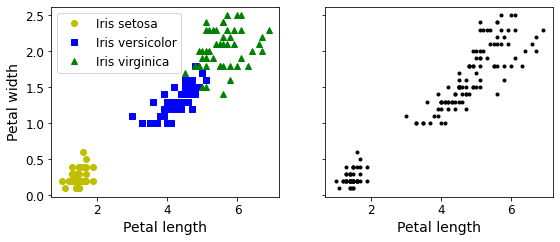

In [ ]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

## <center> Алгоритм K-Means

**K-Means (K-средних)** - один из самых простых алгоритмов кластеризации. Целью кластеризации k-means является разделение **n** точек данных наблюдений на **k** кластеров в соответствии с определенным правилом, а точки данных разделяются в соответствии с подобием. У каждого кластера есть центроид.

Описать суть алгоритма можно несколькими шагами:
1. Задаем число **k** - количество класстеров
2. Случайным образом выбираем **k** случайных точек, которые будут **центрами кластеров** 
3. Вычисляем евклидово расстояние от каждой точки до каждого центра класстеров, после чего каждая точка присваевается ближайшему центру кластера
4. Вычисляются **центроиды** (центры тяжески кластеров)
5. **Центры кластера** смещаются в **центроиды** и точки заново назначаются ближайщим центроидам
6. Изменения центров кластеров и перезакрепление точек за центроидами продолжается итеративно, пока центроиды и границы кластеров не перестанут меняться 


**Центроид** - это точка, полученная усреднением положений всех точек в кластере. Каждая точка наблюдения принадлежит кластеру, представленному ближайшим к ней центроидом. 

Модель, выберет метод кластеризации с наименьшей суммой квадратов расстояний (функция потерь) от n точек наблюдения до центроида кластера в качестве выходных данных модели. В кластерном анализе K-средних переменная признака должна быть числовой переменной, чтобы рассчитать расстояние. 

**Важно!**
Перед запуском алгоритма нужно масштабировать входные признаки, иначе кластеры могут оказаться слишком растянутыми и KMeans будет работать плохо.

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [ ]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [ ]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

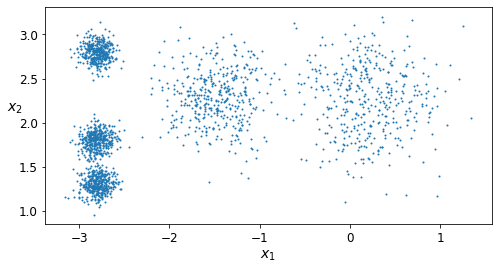

In [ ]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

**Применим алгоритм**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
# метки полученных кластеров
y_pred = kmeans.fit_predict(X)

Каждой сущности была назначена одна из 5 меток:

In [ ]:
y_pred

array([0, 4, 1, ..., 2, 1, 4])

In [ ]:
y_pred is kmeans.labels_

True

Были оценены следующие 5 центроидов (т. е. центров кластеров): 

In [ ]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

Обратите внимание, что экземпляр **KMeans** сохраняет метки экземпляров, на которых он был обучен. Несколько сбивает с толку, в этом контексте _label_ экземпляра - это индекс кластера, которому этот экземпляр назначается: 

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 0, 2, 3, 0, 0, 3, 4, 3, 0, 3,
       0, 0, 0, 2, 0, 0, 0, 3, 3, 2, 0, 2, 3, 2, 0, 3, 2, 2, 0, 3, 3, 3,
       0, 2, 2, 3, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

Конечно, мы можем предсказать метки новых экземпляров: 

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

**Решающие границы**

Построим границы решения модели. Это дает нам диаграмму Вороного: 

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

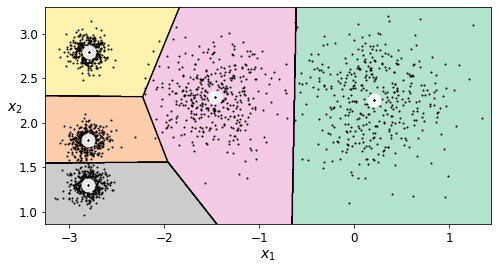

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Неплохо! Некоторые экземпляры рядом с краями, вероятно, были отнесены к неправильному кластеру, но в целом это выглядит неплохо. 

`+` Алгоритм хорошо работает, когда пятна имеют разный диаметр, т.к. при определении кластера объекта алгоритм заботит только растояние до кластера 

**Жесткая и мягкая кластеризации**

Вместо того, чтобы произвольно выбирать ближайший кластер для каждого экземпляра, что называется жесткой кластеризацией, лучше измерить расстояние каждого экземпляра до всех 5 центроидов. Посмотрим, что делает метод **transform**.

Видим, что первый обект (первая строк) имеет расстояние 2.88 до 1-го кластера, 0.33 до 2-го кластера, 2.90 до 3-го кластера и т.д.

In [ ]:
kmeans.transform(X_new)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

Вы можете убедиться, что это действительно евклидово расстояние между каждым экземпляром и каждым центроидом: 

In [ ]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

**Параметры алгоритма**

Класс **KMeans** по умолчанию применяет оптимизированный алгоритм. Чтобы получить исходный алгоритм K-средних, вы должны установить `init ="random"`, `n_init = 1` и` algorithm = "full" `. Эти гиперпараметры будут объяснены ниже. 

Давайте запустим алгоритм K-средних для 1, 2 и 3 итераций, чтобы увидеть, как перемещаются центроиды:

In [ ]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

Отобразим их

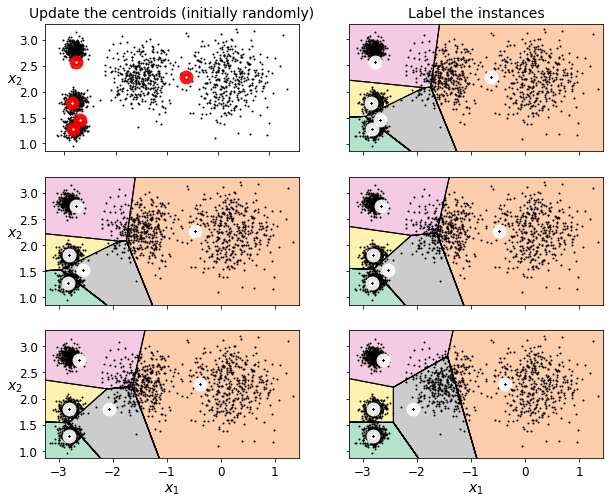

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

**Вариабельность K-средних**

В исходном алгоритме K-средних центроиды просто инициализируются случайным образом, а алгоритм просто выполняет одну итерацию для постепенного улучшения центроидов, как мы видели выше.

Однако одна из основных проблем этого подхода заключается в том, что если вы запускаете K-Means несколько раз (или с разными случайными начальными числами), он может сходиться к очень разным решениям, как вы можете видеть ниже: 

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

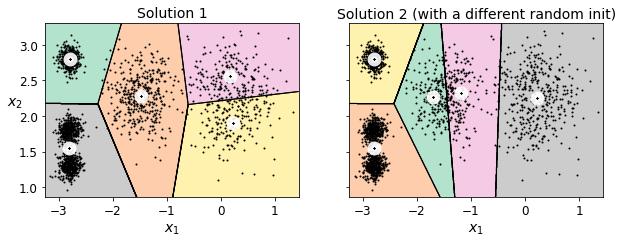

In [ ]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

### Инерция 

Чтобы выбрать лучшую модель, нам понадобится способ оценки производительности модели K-Mean. К сожалению, кластеризация - это неконтролируемая задача, поэтому у нас нет целевой функции. Но, по крайней мере, мы можем измерить расстояние между каждым экземпляром и его центроидом. В этом заключается идея метрики инерции.

In [ ]:
kmeans.inertia_

211.5985372581684

Как вы можете легко убедиться, **инерция** - это сумма квадратов расстояний между каждым обучающим экземпляром и его ближайшим центроидом.

Ниже представлен "ручной" пересчет инерции

In [ ]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

Метод `score ()` возвращает отрицательную инерцию. Почему отрицательный? Дело в том, что метод предсказателя `score ()` всегда должен соблюдать правило «больше значит лучше». Достаточно просто проигнорировать минус перед значением

In [ ]:
kmeans.score(X)

-211.59853725816856

### Множественные инициализации

Таким образом, один из подходов к решению проблемы изменчивости - просто запустить алгоритм K-средних несколько раз с разными случайными инициализациями и выбрать решение, которое минимизирует инерцию. Например, вот инерции двух «плохих» моделей, показанных на предыдущем рисунке: 

In [ ]:
kmeans_rnd_init1.inertia_

219.8385799007183

In [ ]:
kmeans_rnd_init2.inertia_

236.94908363907354

Как видите, у них более высокая инерция, чем у первой «хорошей» модели, которую мы обучили, а это значит, что они, вероятно, хуже. 

Когда вы устанавливаете гиперпараметр `n_init`, Scikit-Learn запускает исходный алгоритм` n_init` раз и выбирает решение, которое минимизирует инерцию. По умолчанию Scikit-Learn устанавливает n_init = 10.

In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=2,
       tol=0.0001, verbose=0)

Как видите, мы получаем исходную модель, которая, безусловно, является оптимальным решением K-средних (по крайней мере, с точки зрения инерции и при условии, что $k = 5$). На картинке ниже результат оптимальной кластеризации.

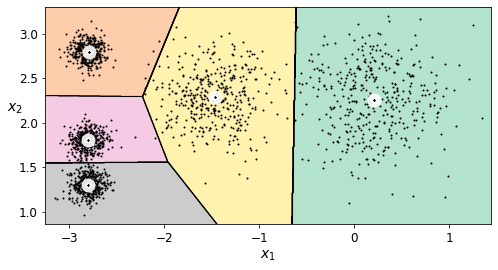

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### <center> Улучшения базового алгоритма

### 1. Методы инициализации центроидов

Вместо того, чтобы инициализировать центроиды полностью случайным образом, предпочтительно инициализировать их, используя следующий алгоритм, предложенный в [статье 2006 г.](https://goo.gl/eNUPw6) Дэвид Артур и Сергей Васильвицкий:
* Возьмите один центроид $c_1$, выбранный случайным образом из набора данных. 
* Возьмите новый центр $c_i$, выбрав экземпляр $\mathbf{x}_i$ с вероятностью: 
$$D(\mathbf{x}_i)^2 / \sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$$

где $D(\mathbf{x}_i)$ расстояние между экземплярами $\mathbf{x}_i$ и ближайший центроид, который уже был выбран. Такое распределение вероятностей гарантирует, что экземпляры, которые находятся дальше от уже выбранных центроидов, с большей вероятностью будут выбраны в качестве центроидов.
* Повторяйте предыдущий шаг, пока не будут выбраны все центроиды $k$. 

Остальная часть алгоритма K-Means ++ - это просто обычные K-Means. С этой инициализацией алгоритм K-средних с гораздо меньшей вероятностью сойдется к субоптимальному решению, поэтому можно значительно уменьшить `n_init`. В большинстве случаев это в значительной степени компенсирует дополнительную сложность процесса инициализации. 

Чтобы установить инициализацию на K-Means ++, просто установите `init =" k-means ++ "` (фактически это значение по умолчанию):

In [ ]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

### 2. Ускоренные K-means

Алгоритм K-средних можно значительно ускорить, избегая множества ненужных вычислений расстояний: это достигается за счет использования неравенства треугольника (учитывая три точки A, B и C, расстояние AC всегда таково, что AC ≤ AB + BC) и сохраняя трек нижних и верхних границ для расстояний между экземплярами и центроидами (смотрите в [статье 2003](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf) Чарльз Элкан для более подробной информации).

Чтобы использовать вариант K-средних Элькана, просто установите `algorithm =" elkan "`. Обратите внимание, что он не поддерживает разреженные данные, поэтому по умолчанию Scikit-Learn использует «elkan» для плотных данных и «full» (обычный алгоритм K-средних) для разреженных данных. 

In [ ]:
%timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(X)

50 loops, best of 5: 87.2 ms per loop


In [ ]:
%timeit -n 50 KMeans(algorithm="full", random_state=42).fit(X)

50 loops, best of 5: 121 ms per loop


В этом случае нет большой разницы, так как набор данных довольно мал.

### 3. Mini-Batch K-Means

Scikit-Learn также реализует вариант алгоритма K-средних, который поддерживает мини-пакеты (см. [Этот документ](http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf)):

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [ ]:
minibatch_kmeans.inertia_

211.93186531476775

Если набор данных не умещается в памяти, самый простой вариант - использовать класс memmap. Сначала загрузим MNIST:

In [ ]:
import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

In [ ]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [ ]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Если ваши данные настолько велики, что вы не можете использовать memmap, все усложняется. Начнем с написания функции для загрузки следующего пакета (в реальной жизни данные загружаются с диска):

In [ ]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

Теперь мы можем обучать модель, загружая ее по одной партии. Нам также необходимо реализовать несколько инициализаций и сохранить модель с наименьшей инерцией: 

In [ ]:
np.random.seed(42)

In [ ]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [ ]:
best_kmeans.score(X)

-211.70999744411483

Мини-пакетные К-средние намного быстрее, чем обычные К-средние: 

In [ ]:
%timeit KMeans(n_clusters=5, random_state=42).fit(X)

10 loops, best of 5: 44.4 ms per loop


In [ ]:
%timeit MiniBatchKMeans(n_clusters=5, random_state=42).fit(X)

10 loops, best of 5: 23.6 ms per loop


Это *намного* быстрее! Однако его производительность часто ниже (более высокая инерция), и он продолжает ухудшаться по мере увеличения _k_. Давайте построим график отношения инерции и отношения времени обучения между K-средними мини-пакетами и обычными K-средними: 

In [ ]:
from timeit import timeit

In [ ]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

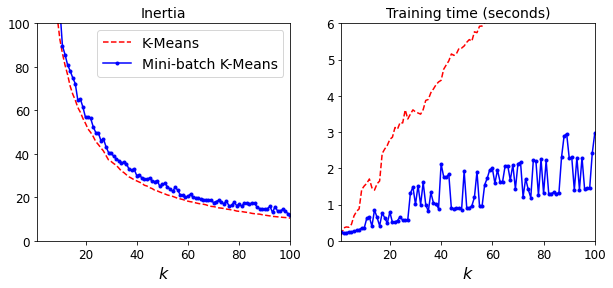

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

### <center> Нахождение оптимального количества кластеров 

Что, если для количества кластеров задано значение меньше или больше 5?

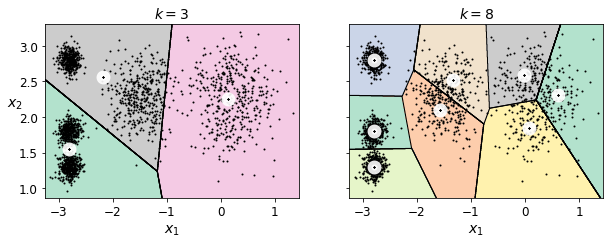

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

Эти две модели выглядят не очень хорошо. А что насчет их инерции? 

In [ ]:
kmeans_k3.inertia_

653.2167190021553

In [ ]:
kmeans_k8.inertia_

118.41983763508077

Мы не можем просто взять значение $k$, которое минимизирует инерцию, поскольку оно продолжает снижаться по мере увеличения $k$. Действительно, чем больше кластеров, тем ближе каждый экземпляр будет к своему ближайшему центроиду и, следовательно, тем меньше будет инерция. Однако мы можем построить график инерции как функцию $k$ и проанализировать полученную кривую: 

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

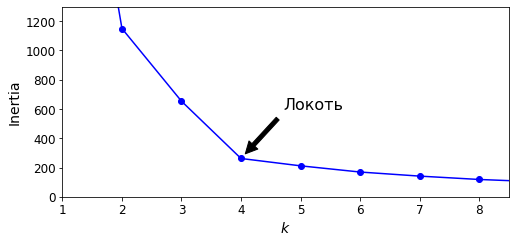

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Локоть',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

Как видите, есть изгиб при $k = 4$, что означает, что меньшее количество кластеров будет плохо, а большее количество кластеров не поможет и может разрезать кластеры пополам. Итак, $k = 4$ довольно хороший выбор. Конечно, в этом примере это не идеально, поскольку это означает, что два больших двоичных объекта в нижнем левом углу будут рассматриваться как один кластер, но, тем не менее, это довольно хорошая кластеризация. 

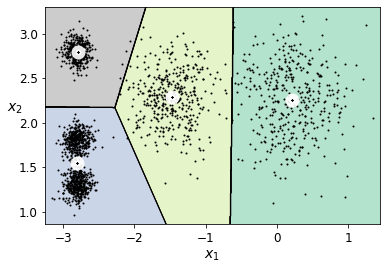

In [ ]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

Другой подход - посмотреть на показатель **силуэта**, который представляет собой средний коэффициент силуэта по всем экземплярам. 
Коэффициент силуэта экземпляра находится так:
$$\frac{(b - a)}{max(a, b)}$$

где:

$a$ - среднее расстояние до других экземпляров в том же кластере (это _среднее расстояние внутри кластера_)

$b$ - это _среднее расстояние до ближайшего кластера_, то есть среднее расстояние до экземпляров следующего ближайшего кластера (определяемого как тот, который минимизирует $b$, исключая собственный кластер экземпляра).

Коэффициент силуэта может варьироваться от -1 до +1:
- коэффициент, близкий к **+1**, означает, что экземпляр находится внутри своего собственного кластера и далеко от других кластеров
- коэффициент, близкий к **0**, означает, что он находится близко к границе кластера
- коэффициент, близкий к **-1**, означает, что экземпляр мог быть назначен не тому кластеру

Построим график зависимости оценки силуэта от $k$: 

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [ ]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

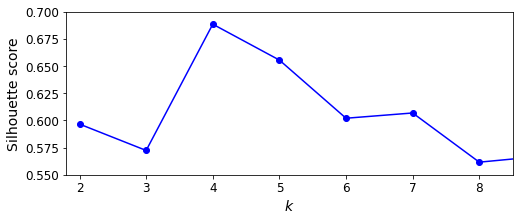

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

Как видите, эта визуализация намного богаче предыдущей: в частности, хотя она и подтверждает, что $k = 4$ - очень хороший выбор, но также подчеркивает тот факт, что $k = 5$ тоже неплох.

Еще более информативная визуализация предоставляется, когда вы наносите на график коэффициент силуэта каждого экземпляра, отсортированный по кластеру, которому они назначены, и по значению коэффициента. Это называется ***силуэтной диаграммой***: 

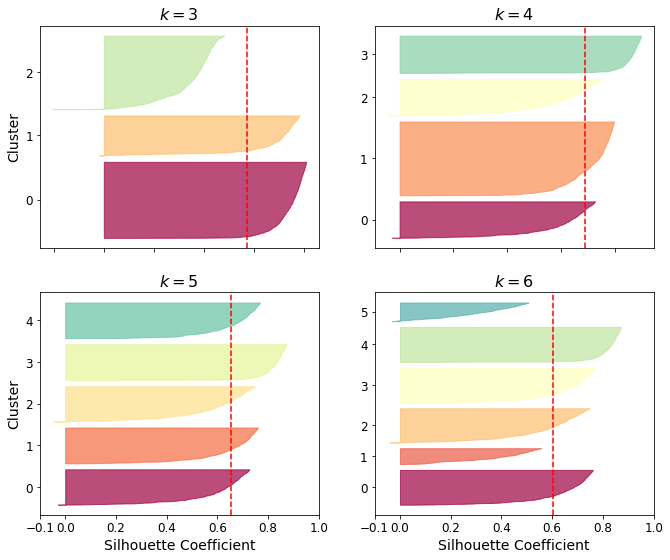

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Каждая диаграмма содержит по одной форме, похожей на лезвие ножа. **Высота** формы показывает количество образцов в кластере. **Ширина** - отсортированные коэффициенты силуэтов образцов в кластере (чем шир, тем лучше). **Пунктирная линия** обозначает средний коэффициент силуэта.

Как видите, $k = 5$ выглядит здесь лучшим вариантом, поскольку все кластеры примерно одинакового размера, и все они пересекают пунктирную линию, которая представляет собой средний балл по силуэту. 

### Недостатки K-Means:

- Необходимо запускать несколько раз из-за возможности нахождения субоптимального решения
- Алгортим работает плохо, когда кластеры сильно отличаются по размерам, имеют разные плотности и несферические формы 

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

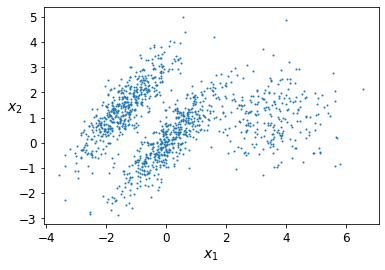

In [ ]:
plot_clusters(X)

In [ ]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

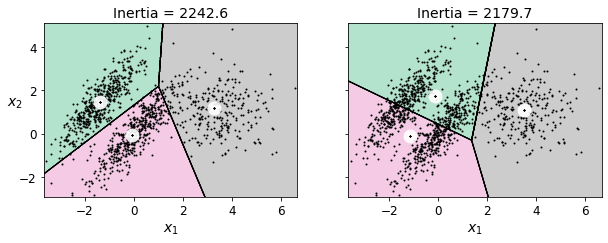

In [ ]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

## DBSCAN

Довольно мощный алгоритм кластеризации, который имеет ряд преимуществ перед KMeans. Он определяет кластеры как непрерывные области высокой плотности. Шаги алгоритма:

1. Для каждого образца алгоритм подсчитывает количество "соседей" в рамках небольшого расстояния $\varepsilon$ (эпсилон) от него. Эта область называется $\varepsilon$-соседством
2. Если образец имеет по крайней мере **min_samples** образцов в $\varepsilon$-соседстве (включая себя), тогда он считается ***центральным образцом (core example)***. Центральный образец - это такой, который расположен в плотных областях.
3. Все образцы в соседстве с центральным принадлежат тому же кластеру, что и центральный образец.Это соседтсво может включаить другие соседние образцы. Длинная последовательнсть соседствующих центральных образцов формирует одиночный кластер
4. Любой образец, не являющийся центральным и не имеющих такового в своем соседстве, считается аномалией

Алгоритм хорошо работает, если все кластеры достаточно плотные и хорошо разделены областями низкой плотности.


In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
# Метки полученных кластеров
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [ ]:
len(dbscan.core_sample_indices_)

808

In [ ]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [ ]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [ ]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

Важно правильно подобрать параметры `eps` и `min_samples`. При слишком маленьком **eps** алгоритм будет выделять в кластер очень плотно лежащие точки, рискуем получить слишком много кластеров и аномальных точек.

На графике слева пример неудачного выбора параметра **eps**: в итоге получили много кластеров (группы точек, выделеные одним цветом) и аномалий (обозначены крестиками).

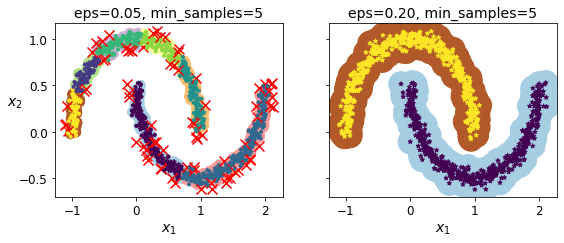

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

**Невозможность применения на новых данных**

Алгоритм **DBScan** нельзя применить для определения кластеров для новых данных, у него нет метода `predict()`, есть только `fit()` и `fit_predict()`. В чистом виде данный алгоритм можно применить только, чтобы кластеризовать сущестующие данные.

Однако, можно попробовать обойти данное ограничение, построив модель классификации, используя метки кластеризации **dbscan** как целевую переменную с классамм

In [ ]:
dbscan = dbscan2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Обучаем классификатор
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

Создаем масссив новых точек, которые будем классифицировать

In [ ]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [ ]:
# Предсказываем вероятности отнесения точек к каждому классу
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

На рисунке ниже крестиками изображены новые точки которые мы классифицировали, а также разделяющая классы прямая.

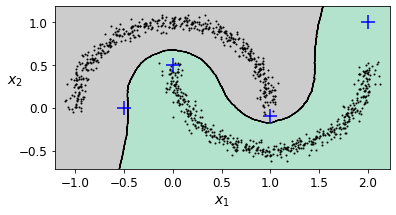

In [ ]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

In [ ]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

In [ ]:
agg1.children_

array([[ 427,  675],
       [ 557,  782],
       [ 126,  597],
       ...,
       [1990, 1994],
       [1986, 1995],
       [1996, 1997]])